# Retail Analysis with Walmart Data

**Objective :** In the US, Walmart store, would like to predict the sales and demand accurately.

### Declare all necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\nbhup\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('Walmart_Store_sales.csv', parse_dates=["Date"], dayfirst=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [4]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.shape

(6435, 8)

In [7]:
# 
df["Year"]= pd.DatetimeIndex(df["Date"]).year
df["Month"]= pd.DatetimeIndex(df["Date"]).month
df["Day"]= pd.DatetimeIndex(df["Date"]).day

In [8]:
def def_quarter(dt_month):
    if dt_month <= 3:
        return pd.Series(["Q1", "Semester1"])
    elif dt_month <= 6:
        return pd.Series(["Q2", "Semester1"])
    elif dt_month <= 9:
        return pd.Series(["Q3", "Semester2"])
    else:
        return pd.Series(["Q4", "Semester2"])
    
df[["Quarter", "Semester"]] = df.Month.apply(def_quarter)

In [9]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter,Semester
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,Q1,Semester1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,Q1,Semester1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,Q1,Semester1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,Q1,Semester1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,Q1,Semester1


## Analysis Tasks

### Basic statistics tasks

**Basic statistics task#1 :** Which stores has maximum sales

In [10]:
df.groupby('Store').sum()["Weekly_Sales"].sort_values(ascending=False).head(1)

Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

**Conclusion :** Stores 20 is doing maximum sales

**Basic statistics task#2 :** Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [11]:
df.groupby('Store').std()["Weekly_Sales"].sort_values(ascending=False).head(1)

Store
14    317569.949476
Name: Weekly_Sales, dtype: float64

In [12]:
mean_14 = df.Weekly_Sales[df.Store == 14].mean()
coeff_14 = (df.groupby('Store').std()["Weekly_Sales"][14]/mean_14) * 100
round(coeff_14,2)

15.71

**Conclusion : ** There is a maximum Variance of sales in __store#14__ and coefficient of mean to standard deviation is __15.71__. 

**Basic statistics task#3 :** Which store/s has good quarterly growth rate in Q3’2012

In [13]:
#Filter records with year 2012.
#We require growth rate of Q3 as compared to Q2, so take only that subset.
df_2012_Q2_Q3 = df[["Store", "Weekly_Sales", "Quarter"]][(df.Year == 2012) & (df.Quarter.isin(["Q2", "Q3"]))]

In [14]:
#Aggregate the sum of Sales by Store and Quarter
df_2012_Q2_Q3 = df_2012_Q2_Q3.groupby(["Store", "Quarter"]).sum().reset_index()

In [15]:
#For comparison create a column for Q2_Sales by shifting records down
df_2012_Q2_Q3["Q2_Weekly_Sales"] = df_2012_Q2_Q3.Weekly_Sales.shift(1)
df_2012_Q2_Q3 = df_2012_Q2_Q3[df_2012_Q2_Q3.Quarter == "Q3"]

In [16]:
#calculate Growth rate, note that only Q3 growth rates will be calculated correctly which is of our interest.
df_2012_Q2_Q3["Growth_Rate"] = (df_2012_Q2_Q3.Weekly_Sales - df_2012_Q2_Q3.Q2_Weekly_Sales) / df_2012_Q2_Q3.Q2_Weekly_Sales * 100
df_2012_Q2_Q3.sort_values(ascending=False, by="Growth_Rate").head(11)

,Store,Quarter,Weekly_Sales,Q2_Weekly_Sales,Growth_Rate
13,7,Q3,8262787.39,7290859.27,13.330776
31,16,Q3,7121541.64,6564335.98,8.488378
69,35,Q3,11322421.12,10838313.00,4.466637
51,26,Q3,13675691.91,13155335.57,3.955478
77,39,Q3,20715116.23,20214128.46,2.478404
81,41,Q3,18093844.01,17659942.73,2.456980
87,44,Q3,4411251.16,4306405.78,2.434638
47,24,Q3,17976377.72,17684218.91,1.652088
79,40,Q3,12873195.37,12727737.53,1.142841
45,23,Q3,18641489.15,18488882.82,0.825395


**Conclusion :** Stores **7, 16, 35, 26, 39, 41, 44, 24, 40 and 23** have positive quarterly growth rate in Q3’2012 and in given order.

**Basic statistics task#4 :** Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [17]:
#Find the mean value of sales in non Holiday weeks
non_holiday_mean_sales = np.round(df.Weekly_Sales[df.Holiday_Flag==0].mean(), 2)
non_holiday_mean_sales

1041256.38

In [18]:
df_holiday = df[(df.Holiday_Flag == 1)]
df_holiday_mean_sales = np.round(df_holiday.groupby("Date").mean()[["Weekly_Sales"]],2).reset_index()
df_holiday_mean_sales[df_holiday_mean_sales.Weekly_Sales >= non_holiday_mean_sales]

,Date,Weekly_Sales
0,2010-02-12,1074148.39
2,2010-11-26,1462688.96
4,2011-02-11,1051915.40
6,2011-11-25,1479857.89
8,2012-02-10,1111320.18
9,2012-09-07,1074001.32


**Conclusion :** <br>
In the years __2010, 2011 and 2012 : Super Bowl Event__ crossed the mean sales.<br>
In the year __2010 and 2011 : Thanks Giving Day__ crossed the mean sales.<br>
And in the year __2012 : Labour Day__ crossed the mean sales.

**Basic statistics task#5 :** Provide a monthly and semester view of sales in units and give insights

In [19]:
df_month_sales = df.groupby("Month").sum()[["Weekly_Sales"]].reset_index()
df_semester_sales = df.groupby("Semester").sum()[["Weekly_Sales"]].reset_index()

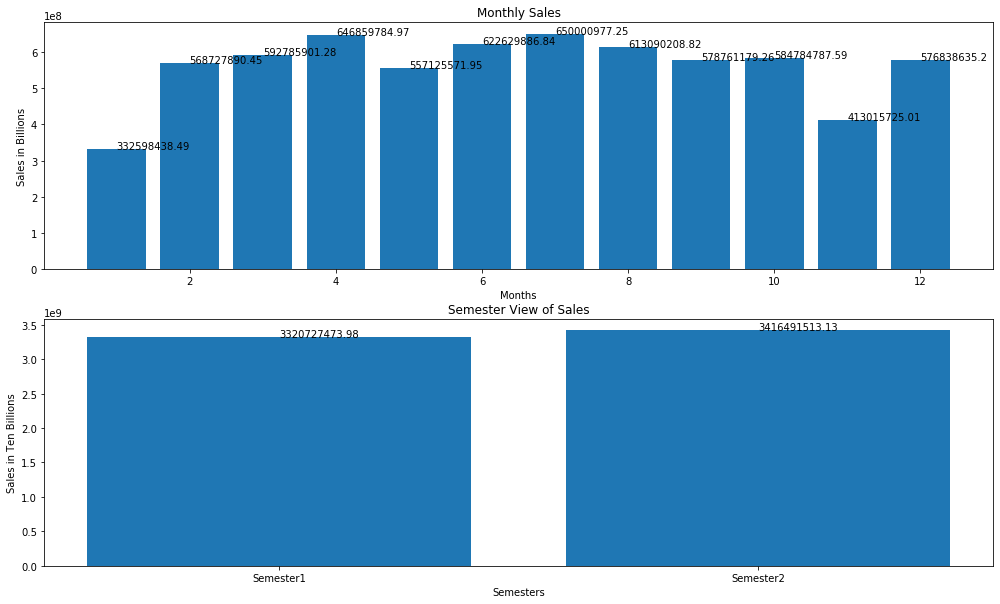

In [20]:
plt.figure(figsize=(17,10))
plt.subplot(2, 1, 1) 
plt.bar(df_month_sales.Month, df_month_sales.Weekly_Sales)
for x,y in zip(df_month_sales.Month, np.round(df_month_sales.Weekly_Sales,2)): 
    plt.text(x, y, str(y))
plt.title("Monthly Sales")
plt.xlabel("Months")
plt.ylabel("Sales in Billions")

plt.subplot(2, 1, 2)
plt.bar(df_semester_sales.Semester, df_semester_sales.Weekly_Sales)
for x,y in zip(df_semester_sales.Semester, np.round(df_semester_sales.Weekly_Sales,2)): 
    plt.text(x, y, str(y))
plt.title("Semester View of Sales")
plt.xlabel("Semesters")
plt.ylabel("Sales in Ten Billions")
plt.show()

In [21]:
#Find the months having Sales less than the mean sales
df_month_sales[df_month_sales.Weekly_Sales < df_month_sales.Weekly_Sales.mean()]

,Month,Weekly_Sales
0,1,3.325984e+08
4,5,5.571256e+08
10,11,4.130157e+08


**Conclusion :** <br>
Month of **July** has the maximum sales whereas **Jan** has the least sales.
Only 3 months **Jan, May and November** resulted in the decreased sales than the mean sales of 5.6 Billions.

Semester wise **Semester2** ie Months **Jun to Dec** has contributed almost 10 Billion sales more than that was done in the first semester.

## Statistical Model

For Store 1 - Build prediction models to forecast demand

In [22]:
df_store_1 = df[df.Store == 1]

In [23]:
df_store_1.shape

(143, 13)

Hypothesize if CPI, unemployment, and fuel price have any impact on sales

In [24]:
selected_features = ["CPI", "Unemployment","Fuel_Price"]
X = df_store_1[selected_features]
y = df_store_1.Weekly_Sales

In [25]:
train_X, test_X, train_y, test_y = train_test_split( X , y, train_size = 0.8, random_state = 42 )

In [26]:
train_y.shape, train_X.shape

((114,), (114, 3))

In [27]:
model_Store_1 = sm.OLS(train_y, train_X).fit()
model_Store_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              3920.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):                   2.04e-112
Time:                        15:25:34   Log-Likelihood:                         -1520.5
No. Observations:                 114   AIC:                                      3047.
Df Residuals:                     111   BIC:                                      3055.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
CPI           7537.2120   1604.389      4.698      0.000    4358.007    1.07e+04
Unemployment  2862.9403   3.21e+04      0.089      0.929   -6.08e+04    6.66e+04
Fuel_Price   -3.314e+04   4.55e+04     -0.728      0.468   -1.23e+05    5.71e+04
==============================================================================
Omnibus:                       93.327   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              830.125
Skew:                           2.733   Prob(JB):                    5.50e-181
Kurtosis:                      15.037   Cond. No.                         760.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion :** For Store 1
- CPI seems to be good predictor of Sales.
- Unemployment and Fuel Price are not good predictors of Sales

#### Model for Best Accuracy

In [28]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter,Semester
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,Q1,Semester1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,Q1,Semester1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,Q1,Semester1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,Q1,Semester1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,Q1,Semester1


In [29]:
#Categorical_Features
categorical_features = ['Quarter', 'Semester']

In [30]:
df_encoded = pd.get_dummies( df,
                              columns = categorical_features,
                              drop_first = True )

In [31]:
df_encoded.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'Quarter_Q2', 'Quarter_Q3', 'Quarter_Q4', 'Semester_Semester2'],
      dtype='object')

In [32]:
selected_features = ["Store", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment", "Year", "Month",
                     "Day", "Quarter_Q2", "Quarter_Q3", "Quarter_Q4", "Semester_Semester2"]
X = df_encoded[selected_features]
y = df_encoded.Weekly_Sales

In [33]:
train_X, test_X, train_y, test_y = train_test_split( X , y, train_size = 0.8, random_state = 42 )

In [34]:
train_y.shape, train_X.shape

((5148,), (5148, 13))

In [35]:
model_lr = sm.OLS(train_y, train_X).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.808
Model:                            OLS   Adj. R-squared (uncentered):              0.808
Method:                 Least Squares   F-statistic:                              1806.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):                        0.00
Time:                        15:25:35   Log-Likelihood:                         -75057.
No. Observations:                5148   AIC:                                  1.501e+05
Df Residuals:                    5136   BIC:                                  1.502e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Store              -1.512e+04    579.276    -26.105      0.000   -1.63e+04    -1.4e+04
Holiday_Flag        3.837e+04   3.03e+04      1.267      0.205    -2.1e+04    9.77e+04
Temperature        -1159.1799    611.277     -1.896      0.058   -2357.544      39.184
Fuel_Price           738.2305   1.69e+04      0.044      0.965   -3.23e+04    3.38e+04
CPI                -2279.7965    211.011    -10.804      0.000   -2693.469   -1866.124
Unemployment       -2.333e+04   4305.596     -5.419      0.000   -3.18e+04   -1.49e+04
Year                 950.2481     43.632     21.779      0.000     864.711    1035.785
Month               4.322e+04   8927.999      4.840      0.000    2.57e+04    6.07e+04
Day                -1485.8588    830.645     -1.789      0.074   -3114.276     142.559
Quarter_Q2         -7.288e+04    3.5e+04     -2.083      0.037   -1.41e+05   -4277.546
Quarter_Q3         -4.499e+04   1.86e+04     -2.419      0.016   -8.15e+04   -8528.114
Quarter_Q4          -1.03e+05   3.71e+04     -2.778      0.005   -1.76e+05   -3.03e+04
Semester_Semester2  -1.48e+05   4.55e+04     -3.255      0.001   -2.37e+05   -5.89e+04
==============================================================================
Omnibus:                      120.116   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.138
Skew:                           0.378   Prob(JB):                     2.47e-28
Kurtosis:                       2.857   Cond. No.                     2.65e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is  3e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Conclusion : **
Adjusted R^2 is 0.808
Based on p_value Holiday_Flag, Temperature, Fuel_Price, Day, Quarter_Q2 and Quarter_Q3 are not good predictors of Sales

In [36]:
#Build the new model by excluding above attributes
selected_features = ["Store", "CPI", "Unemployment", "Year", "Month", "Quarter_Q4", "Semester_Semester2"]
X = df_encoded[selected_features]
y = df_encoded.Weekly_Sales

In [37]:
train_X, test_X, train_y, test_y = train_test_split( X , y, train_size = 0.8, random_state = 42 )

In [38]:
train_y.shape, train_X.shape

((5148,), (5148, 7))

In [39]:
model_lr_1 = sm.OLS(train_y, train_X).fit()
model_lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.808
Model:                            OLS   Adj. R-squared (uncentered):              0.807
Method:                 Least Squares   F-statistic:                              3083.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):                        0.00
Time:                        15:25:36   Log-Likelihood:                         -75068.
No. Observations:                5148   AIC:                                  1.501e+05
Df Residuals:                    5141   BIC:                                  1.502e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Store              -1.511e+04    579.476    -26.078      0.000   -1.62e+04    -1.4e+04
CPI                -2406.2919    195.875    -12.285      0.000   -2790.290   -2022.294
Unemployment       -2.528e+04   4124.959     -6.127      0.000   -3.34e+04   -1.72e+04
Year                 945.6605     29.282     32.295      0.000     888.256    1003.065
Month               2.253e+04   5628.680      4.003      0.000    1.15e+04    3.36e+04
Quarter_Q4          3.488e+04   2.66e+04      1.311      0.190   -1.73e+04     8.7e+04
Semester_Semester2 -8.991e+04   2.97e+04     -3.029      0.002   -1.48e+05   -3.17e+04
==============================================================================
Omnibus:                      125.300   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.923
Skew:                           0.392   Prob(JB):                     8.30e-30
Kurtosis:                       2.906   Cond. No.                     9.01e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Conclusion : **
Adjusted R^2 is 0.807 which is good compared to previous model
Based on Quarter_Q4 is not a good predictor of Sales

In [40]:
#Build a new iterative model by removing Q4 from above
selected_features = ["Store", "CPI", "Unemployment", "Year", "Month", "Semester_Semester2"]
X = df_encoded[selected_features]
y = df_encoded.Weekly_Sales

In [41]:
train_X, test_X, train_y, test_y = train_test_split( X , y, train_size = 0.8, random_state = 42 )

In [42]:
train_y.shape, train_X.shape

((5148,), (5148, 6))

In [43]:
model_lr_2 = sm.OLS(train_y, train_X).fit()
model_lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.808
Model:                            OLS   Adj. R-squared (uncentered):              0.807
Method:                 Least Squares   F-statistic:                              3596.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):                        0.00
Time:                        15:25:36   Log-Likelihood:                         -75069.
No. Observations:                5148   AIC:                                  1.501e+05
Df Residuals:                    5142   BIC:                                  1.502e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Store              -1.511e+04    579.507    -26.069      0.000   -1.62e+04    -1.4e+04
CPI                -2408.6468    195.880    -12.297      0.000   -2792.655   -2024.638
Unemployment       -2.531e+04   4125.153     -6.136      0.000   -3.34e+04   -1.72e+04
Year                 937.6049     28.632     32.747      0.000     881.474     993.736
Month               2.712e+04   4409.438      6.150      0.000    1.85e+04    3.58e+04
Semester_Semester2 -1.004e+05   2.86e+04     -3.512      0.000   -1.56e+05   -4.44e+04
==============================================================================
Omnibus:                      127.216   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.259
Skew:                           0.397   Prob(JB):                     2.58e-30
Kurtosis:                       2.920   Cond. No.                     8.01e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Conclusion : **
Adjusted R^2 is 0.807 and this is our final model
Based on p_values we can say that Store, CPI, Unemployment, Year, Month, Quarter_Q4 and Semester_Semester_2 are the best predictors of sales with the equation

**Weekly Sales = 937.6049 \* Year - 1.511e+04 \* Store - 2408.6468 \* CPI - 2.531e+04 \* Unemployment + 2.712e+04 \* Month - 1.004e+05 \* Semester_Semester2**